## Film Türüne Göre Oy Sayısı

Eksik Oy Sayısı verileri: 0
Eksik Tür verileri: 0
Oy Sayısı'nı sayısal hale getirdikten sonra eksik veriler: 0
              Tür  Oy Sayısı
0          Action     707000
1       Adventure    6500000
2  Alien Invasion    1534000
3       Animation    5137000
4           Anime    1790000


C:\Users\MONSTER\AppData\Local\Temp\ipykernel_19900\1458439148.py:20: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




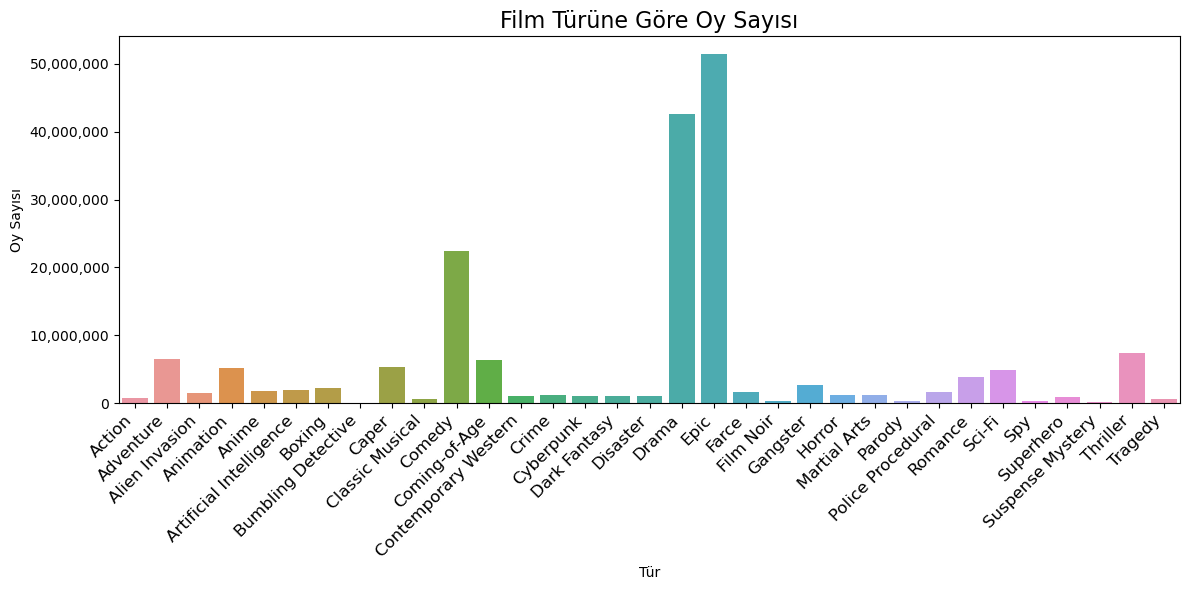

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("Eksik Oy Sayısı verileri:", df["Oy Sayısı"].isnull().sum())
print("Eksik Tür verileri:", df["Tür"].isnull().sum())

df_clean = df.dropna(subset=["Oy Sayısı", "Tür"])

df_clean["Oy Sayısı"] = pd.to_numeric(df_clean["Oy Sayısı"], errors="coerce")

print("Oy Sayısı'nı sayısal hale getirdikten sonra eksik veriler:",
      df_clean["Oy Sayısı"].isnull().sum())

df_tur_oy = df_clean.groupby("Tür")["Oy Sayısı"].sum().reset_index()

print(df_tur_oy.head())

plt.figure(figsize=(12,6))
sns.barplot(data=df_tur_oy, x="Tür", y="Oy Sayısı", estimator=sum, ci=None)

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)) 
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45, ha="right", fontsize=12)

plt.title("Film Türüne Göre Oy Sayısı", fontsize=16)

plt.tight_layout()

plt.show()


## Yıllara Göre Çekilen Film Sayısı

C:\Users\MONSTER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MONSTER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


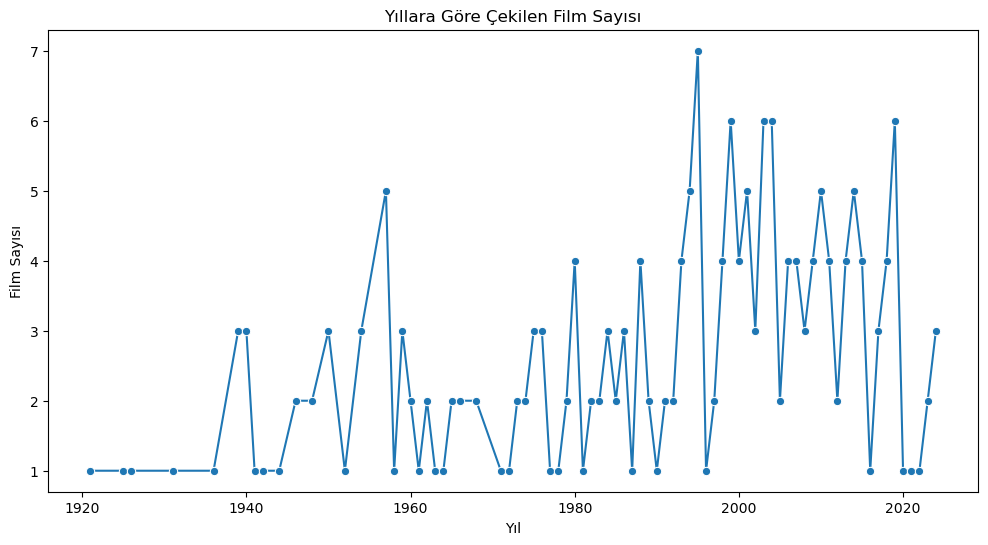

In [20]:
df_yil = df["Çıkış Yılı"].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=df_yil.index, y=df_yil.values, marker="o")
plt.title("Yıllara Göre Çekilen Film Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Film Sayısı")
plt.show()


## Ülkelere Göre Çekilen Film Sayısı

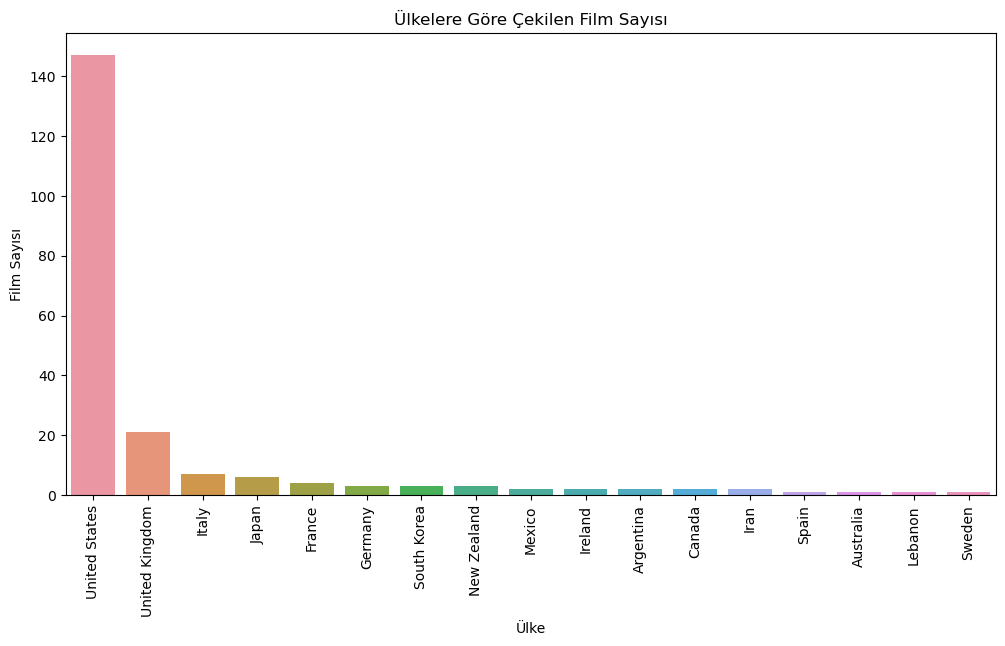

In [26]:
df_ulkeler = df["Ülke"].value_counts().reset_index()
df_ulkeler.columns = ["Ülke", "Film Sayısı"]

plt.figure(figsize=(12,6))
sns.barplot(data=df_ulkeler, x="Ülke", y="Film Sayısı")
plt.xticks(rotation=90)
plt.title("Ülkelere Göre Çekilen Film Sayısı")
plt.show()


## Film Türüne Göre Puan Dağılımı

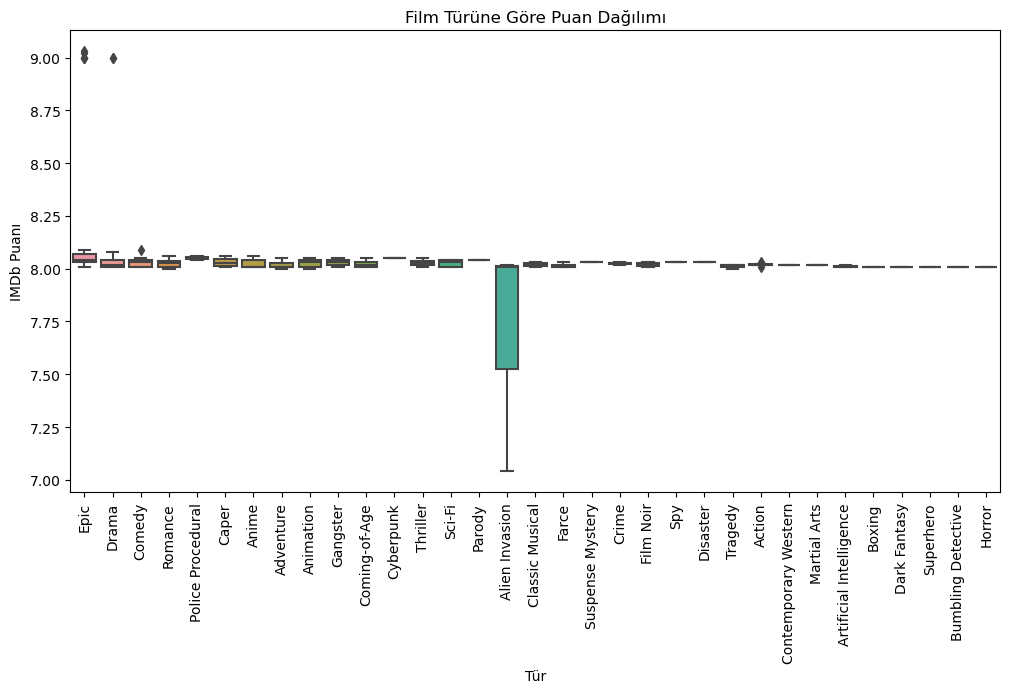

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Tür", y="IMDb Puanı")

plt.xticks(rotation=90, ha='center')

plt.title("Film Türüne Göre Puan Dağılımı")

plt.show()



## Film Türlerine Göre Çekilen Film Dağılımı

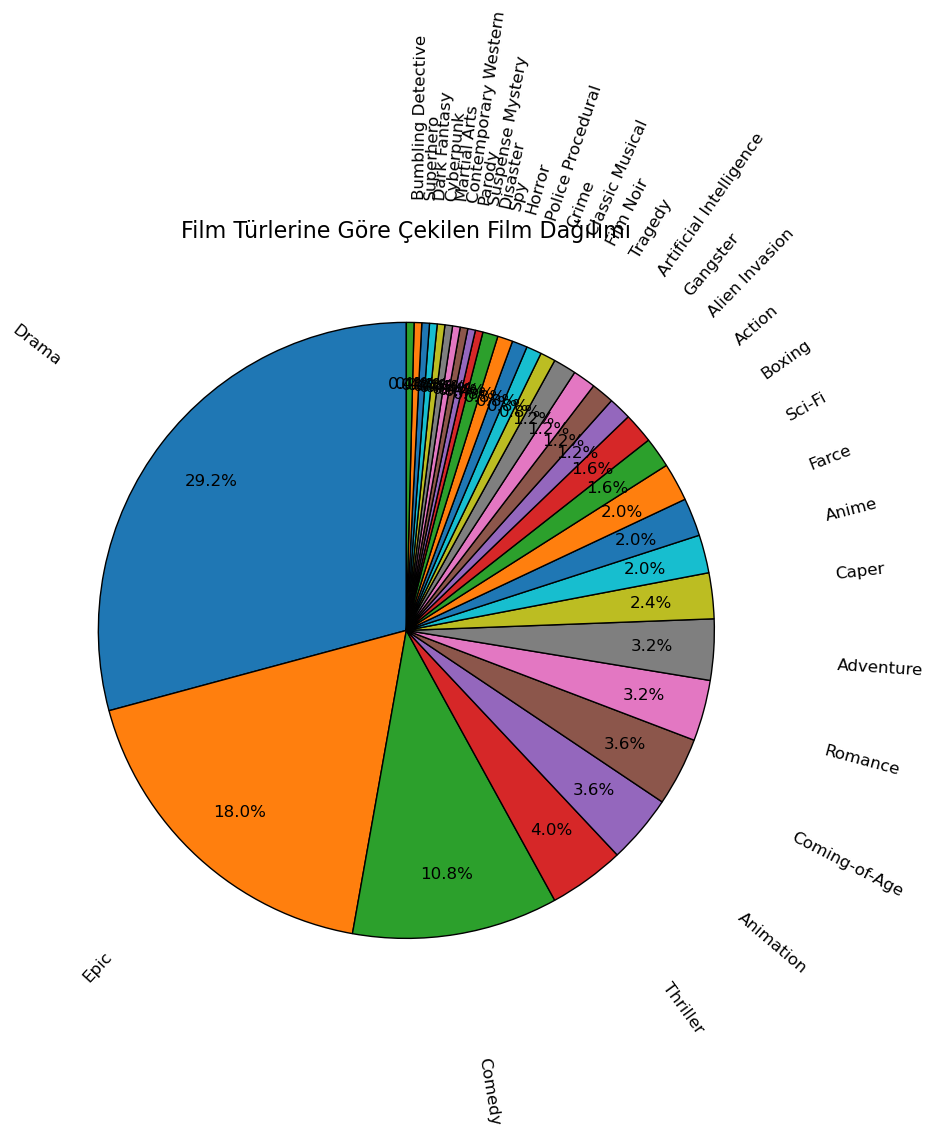

In [169]:
import matplotlib.pyplot as plt

df_tur = df["Tür"].value_counts()

plt.figure(figsize=(10,10))

plt.pie(df_tur, 
        labels=df_tur.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        textprops={'fontsize': 12},  
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
        labeldistance=1.4,  
        pctdistance=0.8,  
        rotatelabels=True) 

plt.title("Film Türlerine Göre Çekilen Film Dağılımı", fontsize=16)

plt.show()


## Yönetmenlere Göre Yorum Sayısı

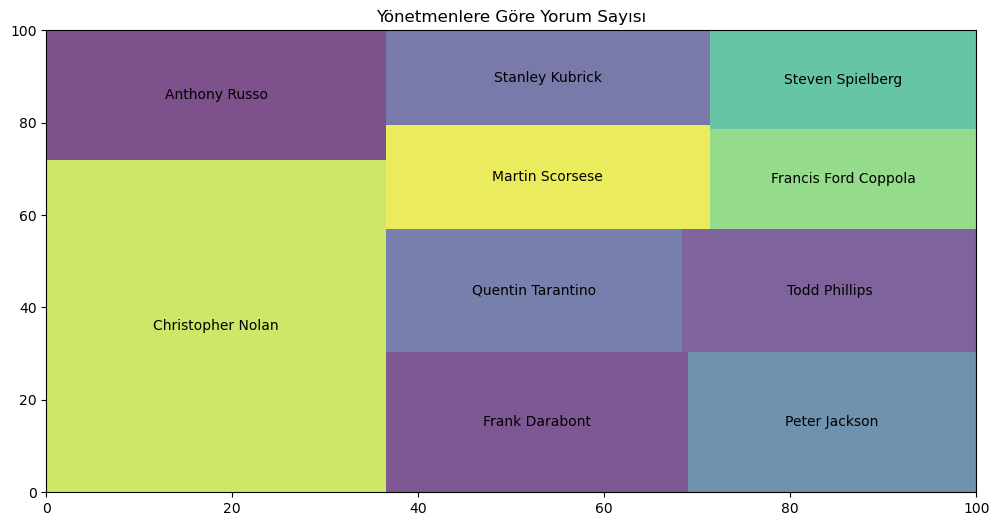

In [186]:
import squarify

df_yonetmen = df.groupby("Yönetmen")["Yorum Sayısı"].sum().reset_index()
df_yonetmen = df_yonetmen.sort_values(by="Yorum Sayısı", ascending=False).head(10)

plt.figure(figsize=(12,6))
squarify.plot(sizes=df_yonetmen["Yorum Sayısı"], label=df_yonetmen["Yönetmen"], alpha=0.7)
plt.title("Yönetmenlere Göre Yorum Sayısı")
plt.show()

## Yönetmen & Yazar Oy Sayısı

C:\Users\MONSTER\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


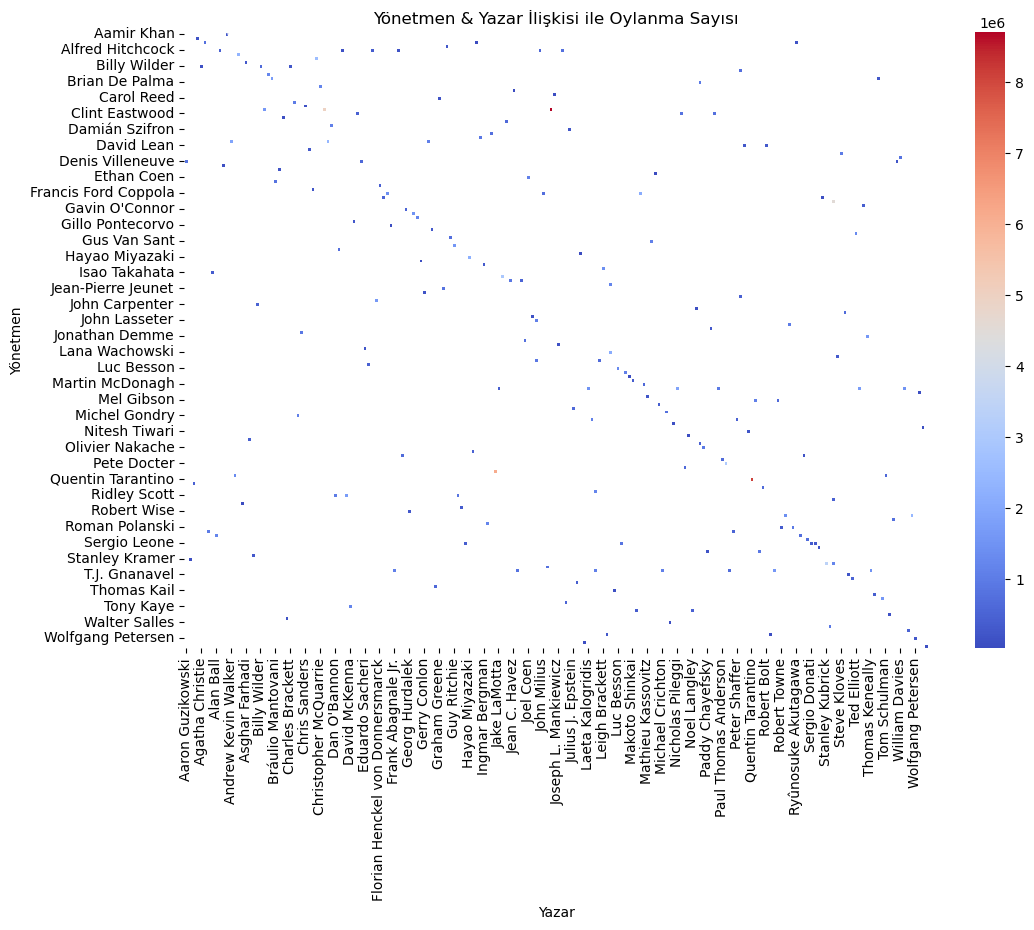

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Excel dosyasını oku
file_path = "C://Users//MONSTER//Desktop//imdb_filmler.xlsx"
df = pd.read_excel(file_path, sheet_name="imdb_filmler")

# Boş değerleri kaldır
df = df.dropna(subset=["Yönetmen", "Yazar", "Oy Sayısı"])

# Yönetmen & Yazar bazında İzlenme Sayısını hesapla
heatmap_data = df.groupby(["Yönetmen", "Yazar"])["Oy Sayısı"].sum().unstack()

# Isı haritası çizimi
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")

plt.title("Yönetmen & Yazar İlişkisi ile Oylanma Sayısı")
plt.xlabel("Yazar")
plt.ylabel("Yönetmen")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


## Ülkelere Göre Çekilen Film Sayısı

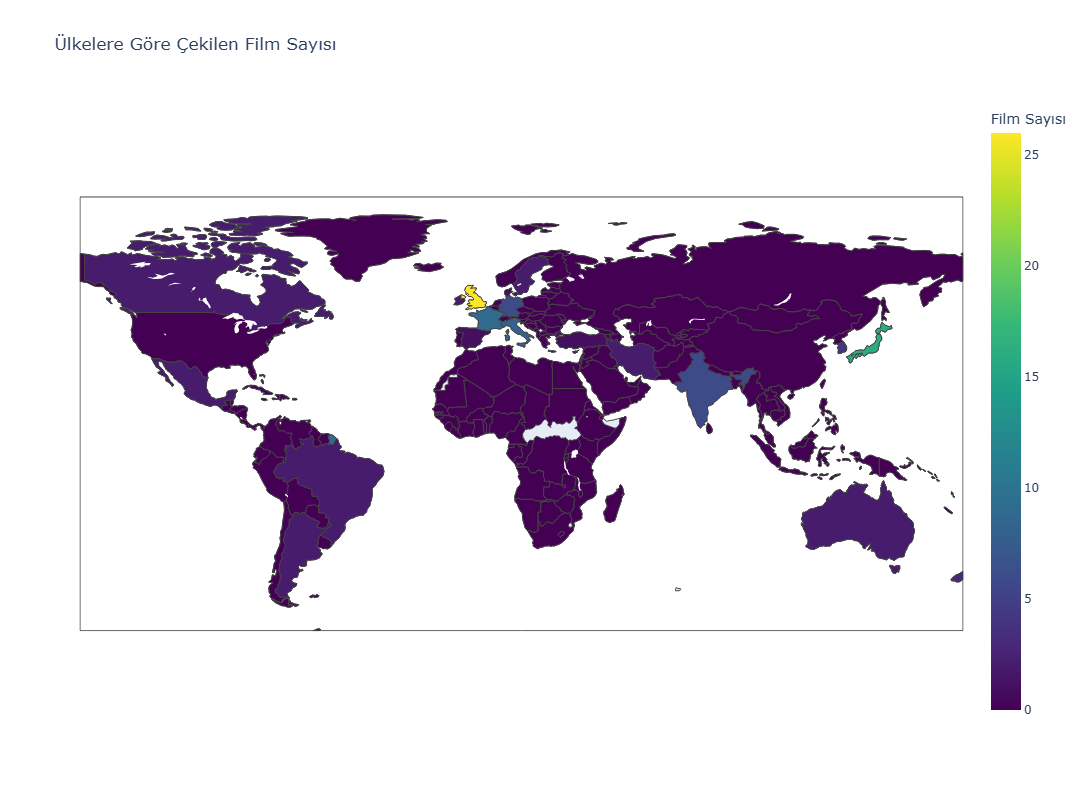

In [173]:
import pandas as pd
import geopandas as gpd
import plotly.express as px


file_path = "C://Users//MONSTER//Desktop//imdb_filmler.xlsx"
df = pd.read_excel(file_path, sheet_name="imdb_filmler")


df_ulkeler = df["Ülke"].value_counts().reset_index()
df_ulkeler.columns = ["Ülke", "Film Sayısı"]


shapefile_url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(shapefile_url)


world = world.merge(df_ulkeler, left_on="NAME", right_on="Ülke", how="left")
world["Film Sayısı"] = world["Film Sayısı"].fillna(0)  

fig = px.choropleth(world, 
                    locations="NAME", 
                    locationmode="country names", 
                    color="Film Sayısı", 
                    hover_name="NAME", 
                    title="Ülkelere Göre Çekilen Film Sayısı",
                    color_continuous_scale="Viridis")

fig.update_layout(
    autosize=False,
    width=1200,  
    height=800,  
)

fig.show()


In [2]:
import pandas as pd

file_path = "C://Users//MONSTER//Desktop//imdb_filmler.xlsx"
df = pd.read_excel(file_path, sheet_name="imdb_filmler")
